In [8]:
from nav_sim_modules.scener import ChestSearchRoomScener

In [9]:
test = ChestSearchRoomScener()


In [10]:
test.generate_scene()

In [11]:
test.components_info

{'obstacle': (array([2.67399962, 0.58997378, 5.38854275]),
  array([-1.87892169,  1.85372532,  6.16989549]),
  array([2.98515213, 1.54791041, 1.77065601]),
  array([ 0.35960628, -2.26826057,  1.9805506 ]),
  array([1.42603888, 0.57659538, 3.78113774]),
  array([-3.23836376, -3.24860031,  5.56003279]),
  array([2.40331385, 0.96917875, 5.32941189]),
  array([-1.51626285, -3.24146867,  2.58155888]),
  array([-2.33326749,  1.48946488,  1.30151453]),
  array([1.1823978 , 0.50055802, 0.47452241])),
 'key': (array([ 2.04964954, -0.91401904,  0.        ]),
  array([-2.8088719,  0.5260885,  0.       ]),
  array([ 0.93139146, -3.22724619,  0.        ]),
  array([-3.13253506, -1.77805127,  0.        ]),
  array([-1.63903462, -1.92600688,  0.        ])),
 'chest': (array([3.37369691, 0.83373465, 0.        ]),
  array([-2.15154215,  2.3389489 ,  0.        ]),
  array([ 0.91965526, -2.4726148 ,  0.        ]),
  array([-3.37537176, -2.71028063,  0.        ]),
  array([-1.73656257, -2.7388156 ,  0.   

In [12]:
test.spawn()

(3.066722598722341, -0.31138077234394634, -0.7149902161078304)

/home/tagokeniot/hypo_workspace/nav-sim-modules/.venv/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/tagokeniot/hypo_workspace/nav-sim-modules/.venv/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/tagokeniot/hypo_workspace/nav-sim-modules/.venv/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


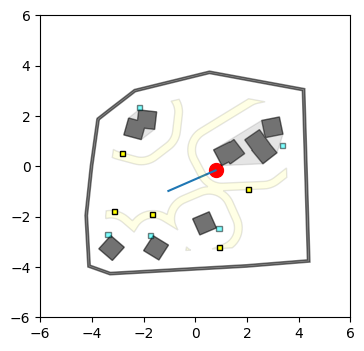

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(0, figsize=(4,4), dpi=100)

ax = fig.add_subplot(111)
plt.xlim(-6,6)
plt.ylim(-6,6)

wall = unary_union(test.room_config.polygons[test.room_config.tag_wall])
obstacles = unary_union(test.room_config.polygons[test.room_config.tag_obstacle])
targets = unary_union(test.room_config.polygons[test.room_config.tag_target])
keys = unary_union(test.room_config.polygons[test.room_config.tag_key])
obs_zones = unary_union(test.room_config.obstacle_hulls)
key_zones = unary_union(test.room_config.key_placing_area)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obs_zones, fc='black', alpha=0.1, zorder=2))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=3))
ax.add_patch(PolygonPatch(targets, fc='cyan', alpha=0.5, zorder=4))
ax.add_patch(PolygonPatch(key_zones, fc='yellow', alpha=0.1, zorder=5))
ax.add_patch(PolygonPatch(keys, fc='yellow', alpha=1, zorder=6))

pose, pix = test.spawn_with_map()

r = 2
angle_x = pose[0] + np.cos(pose[2])*r
angle_y = pose[1] + np.sin(pose[2])*r
ax.plot([pose[0],angle_x], [pose[1],angle_y])

ax.scatter(*pose[:2], s=100, color='red')



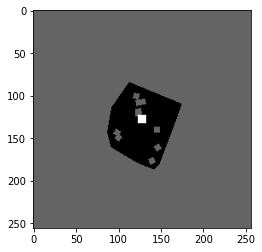

In [14]:
c = len(pix)//2
pix[c-5:c+5, c-5:c+5] = 255

plt.imshow(pix, cmap='gray')